# Part 1:

1. Define/choose a network/graph topology
    - Begin with very basic graph, 4 nodes, colour with a minimum of 2 colours
    - Then build a more complex graph
    - Small world graph maybe? Tree topology?
2. Randomly assign colours to each node (Note: chose suitable number of colours)
3. Run experiments to see if correct colouring of the graph can be reached.
4. Count the number of conflicts over time
5. Deliverable: description of approach and key parameters; experiments and results; link to code


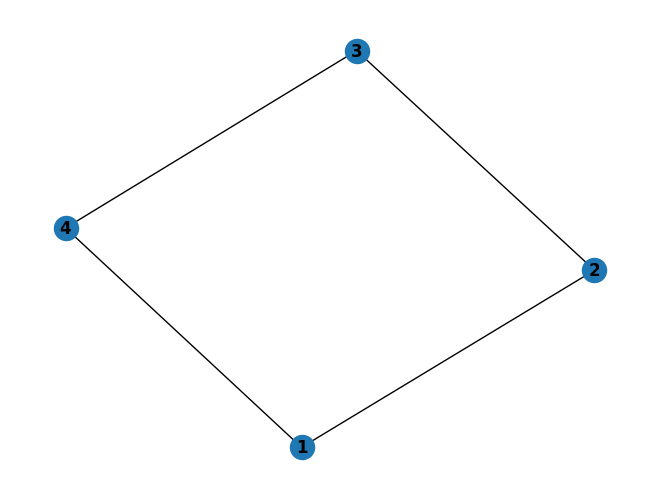

In [101]:
# Create a graph with 4 nodes and 4 edges

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4])

G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()


In [102]:

# define a list of two possible colours
colors = ['r', 'b']


In [103]:
# loop through each node in the graph, and assign a random colour

import random

def assign_random_colors(G, colors):
    for node in G.nodes():
        r = random.random()
        if r < 0.5:
            G.nodes[node]['color'] = colors[0]
        else:
            G.nodes[node]['color'] = colors[1]

    return G


In [104]:
# define the fitness of a node as the number of conflicting neighbours

def fitness(G, node):
    # get the colour of the node
    color = G.nodes[node]['color']
    # get the neighbours of the node
    neighbours = G.neighbors(node)
    # count the number of neighbours with the same colour
    count = 0
    for neighbour in neighbours:
        if G.nodes[neighbour]['color'] == color:
            count += 1
    return count

In [105]:
import random
# define a function to change a node's colour randomly
# note that in bigger graph, this should be randomly picking a different colour
# rather than just switching between the two colours

def change_random(G):
    # get a random node from the graph
    random_node = random.choice(list(G.nodes()))
    # change the colour of the random node using index of the colours list
    if G.nodes[random_node]['color'] == colors[0]:
        G.nodes[random_node]['color'] = colors[1]
    else:
        G.nodes[random_node]['color'] = colors[0]
    
    return G

In [106]:
# overall graph fitness

def overall_fitness(G):
    fitnesses = [fitness(G, node) for node in G.nodes()]
    return sum(fitnesses)


In [107]:
def run_algorithm(G, colors, max_iter):
    # assign random colours
    G = assign_random_colors(G, colors)
    print("Random colors assigned.")
    
    # get the initial fitness
    best_fitness = overall_fitness(G)
    print("Initial fitness:", best_fitness)
    
    # loop through the max number of iterations
    for i in range(max_iter):

        # print worst node fitness
        fitnesses = {node: fitness(G, node) for node in G.nodes()}
        print("Worst node fitness:", min(fitnesses, key=fitnesses.get), min(fitnesses.values()))


        # change the worst node
        G = change_random(G)
        print("Iteration", i+1, "completed.")

        # get the new fitness
        new_fitness = overall_fitness(G)
        print("New fitness:", new_fitness)
        
        # if the new fitness is better, update the best fitness
        if new_fitness < best_fitness:
            best_fitness = new_fitness
            print("New best fitness:", best_fitness)
        
        # if the fitness is 0, we have found a solution
        if best_fitness == 0:
            print("Solution found.")
            break
    
    return G


In [108]:
# run the algorithm
G = run_algorithm(G, colors, 100)



Random colors assigned.
Initial fitness: 4
Worst node fitness: 1 1
Iteration 1 completed.
New fitness: 4
Worst node fitness: 4 0
Iteration 2 completed.
New fitness: 4
Worst node fitness: 1 1
Iteration 3 completed.
New fitness: 4
Worst node fitness: 4 0
Iteration 4 completed.
New fitness: 4
Worst node fitness: 1 1
Iteration 5 completed.
New fitness: 4
Worst node fitness: 2 0
Iteration 6 completed.
New fitness: 0
New best fitness: 0
Solution found.


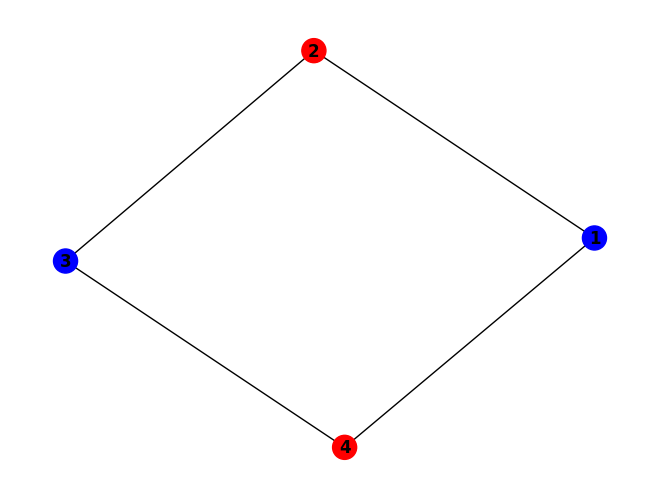

In [109]:
# draw g
nx.draw(G, with_labels=True, font_weight='bold', node_color=[G.nodes[node]['color'] for node in G.nodes()])

# Next Step, Implementing this on a larger graph:

I will reuse most of the functions.